# Requirements

In [1]:
import torch
import matplotlib.pyplot as plt

from torchvision import datasets, transforms, models

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Data

## Dataset

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

100.0%
100.0%
100.0%
100.0%


In [5]:
print(f'length of train dataset : {len(train_dataset)}')
print(f'length of test dataset : {len(test_dataset)}')

length of train dataset : 60000
length of test dataset : 10000


In [6]:
print(f'type of datasets : {type(test_dataset)}')
print(f'type of a data : {type(test_dataset[0])}')

type of datasets : <class 'torchvision.datasets.mnist.FashionMNIST'>
type of a data : <class 'tuple'>


In [10]:
print(f'len of a data : {len(test_dataset[0])}')

len of a data : 2


In [7]:
print(f'type of test_dataset[10][0] : {type(test_dataset[10][0])}')
print(f'shape of test_dataset[10][0] : {test_dataset[10][0].shape}')

type of test_dataset[10][0] : <class 'torch.Tensor'>
shape of test_dataset[10][0] : torch.Size([1, 28, 28])


In [8]:
test_dataset[10][0][0][:5, :5]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0118],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])

In [11]:
test_dataset[2000][1]

8

/tmp/ipykernel_224741/111008559.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


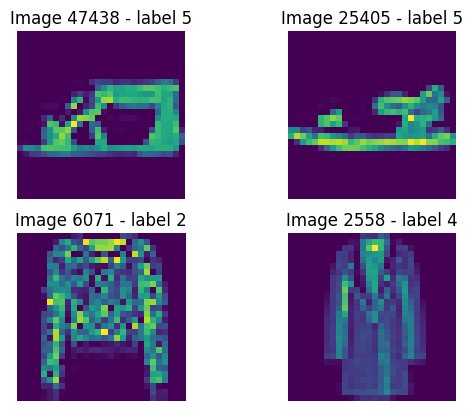

In [12]:
import random

rand_indices = [random.randint(0, len(train_dataset) - 1) for i in range(4)]

fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(train_dataset[rand_indices[0]][0].numpy().transpose((1, 2, 0)))
axs[0, 0].set_title(f'Image {rand_indices[0]} - label {train_dataset[rand_indices[0]][1]}')
axs[0, 0].axis('off')

axs[0, 1].imshow(train_dataset[rand_indices[1]][0].numpy().transpose((1, 2, 0)))
axs[0, 1].set_title(f'Image {rand_indices[1]} - label {train_dataset[rand_indices[1]][1]}')
axs[0, 1].axis('off')

axs[1, 0].imshow(train_dataset[rand_indices[2]][0].numpy().transpose((1, 2, 0)))
axs[1, 0].set_title(f'Image {rand_indices[2]} - label {train_dataset[rand_indices[2]][1]}')
axs[1, 0].axis('off')

axs[1, 1].imshow(train_dataset[rand_indices[3]][0].numpy().transpose((1, 2, 0)))
axs[1, 1].set_title(f'Image {rand_indices[3]} - label {train_dataset[rand_indices[3]][1]}')
axs[1, 1].axis('off')

fig.show()

## Loader

In [13]:
batch_size = 32

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [14]:
for inputs, labels in train_loader:
    print(inputs.shape)
    print(labels.shape)
    break

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [16]:
sample_inputs, sample_labels = next(iter(train_loader))

sample_inputs.shape

torch.Size([32, 1, 28, 28])

In [17]:
sample_inputs = sample_inputs.to(device)
sample_labels = sample_labels.to(device)

# MLP

3.svg

## Flatten

In [18]:
sample_inputs.shape

torch.Size([32, 1, 28, 28])

In [19]:
m = torch.nn.Flatten(start_dim=1)

m(sample_inputs).shape

torch.Size([32, 784])

## MLP

In [20]:
class ImageMLP(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.flatten = torch.nn.Flatten() # default dim is 1
        self.linear1 = torch.nn.LazyLinear(128)
        self.linear2 = torch.nn.Linear(128, 10)
        # self.soft = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear1(x)
        x = torch.nn.functional.relu(x)
        x = self.linear2(x)
        # x = self.soft(x)
        return x

In [21]:
model = ImageMLP().to(device)

In [22]:
sample_prediction = model(sample_inputs)

In [23]:
sample_prediction.shape

torch.Size([32, 10])

In [24]:
sample_prediction[0]

tensor([-0.0988,  0.0821, -0.1082,  0.0056, -0.1336, -0.2392,  0.0063,  0.0413,
         0.1749,  0.2279], device='cuda:0', grad_fn=<SelectBackward0>)

## Train

In [25]:
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [26]:
epoch = 20
for e in range(epoch):

    batch_loss = 0.0
    for b, (inputs, labels) in enumerate(train_loader):

        inputs = inputs.to(device)
        labels = labels.to(device)

        loss = loss_func(model(inputs), labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        batch_loss += loss.item()

        if b % 100 == 99:
            print(f'{loss.item():.4f} [{e + 1:2d}/{(b + 1) * len(inputs):4d}]')
        if b == len(train_loader) - 1:
            print(f'-------------> epoch {e + 1} loss : {batch_loss / len(train_loader):.4f}')

0.4296 [ 1/3200]
0.5406 [ 1/6400]
0.3454 [ 1/9600]
0.6177 [ 1/12800]
0.6934 [ 1/16000]
0.2777 [ 1/19200]
0.8992 [ 1/22400]
0.7596 [ 1/25600]
0.5472 [ 1/28800]
0.4676 [ 1/32000]
0.5116 [ 1/35200]
0.6416 [ 1/38400]
1.0121 [ 1/41600]
0.2297 [ 1/44800]
0.3582 [ 1/48000]
0.5237 [ 1/51200]
0.5270 [ 1/54400]
0.4218 [ 1/57600]
-------------> epoch 1 loss : 0.5250
0.5314 [ 2/3200]
0.8266 [ 2/6400]
0.3672 [ 2/9600]
0.3671 [ 2/12800]
0.2574 [ 2/16000]
0.1989 [ 2/19200]
0.6639 [ 2/22400]
0.3953 [ 2/25600]
0.6511 [ 2/28800]
0.4140 [ 2/32000]
0.2699 [ 2/35200]
0.1748 [ 2/38400]
0.2215 [ 2/41600]
0.4413 [ 2/44800]
0.3643 [ 2/48000]
0.2577 [ 2/51200]
0.4004 [ 2/54400]
0.2515 [ 2/57600]
-------------> epoch 2 loss : 0.4376
0.2171 [ 3/3200]
0.3961 [ 3/6400]
0.2543 [ 3/9600]
0.3720 [ 3/12800]
0.2107 [ 3/16000]
0.2342 [ 3/19200]
0.5430 [ 3/22400]
0.2511 [ 3/25600]
0.5107 [ 3/28800]
0.4427 [ 3/32000]
0.3892 [ 3/35200]
0.4483 [ 3/38400]
0.3464 [ 3/41600]
0.4585 [ 3/44800]
0.3287 [ 3/48000]
0.6296 [ 3/51200]

## Test

### `torch.no_grad()`

In [27]:
preds = model(sample_inputs)

preds.requires_grad

True

In [28]:
with torch.no_grad():
    preds = model(sample_inputs)

preds.requires_grad

False

### Predicting Label

In [29]:
sample_inputs.shape

torch.Size([32, 1, 28, 28])

In [30]:
sample_labels.shape

torch.Size([32])

In [31]:
sample_labels[0]

tensor(0, device='cuda:0')

In [32]:
preds = model(sample_inputs)

preds.shape

torch.Size([32, 10])

In [33]:
preds[0]

tensor([   9.8371,   -5.0055,   -4.6470,    1.3914,  -11.9006,  -43.2518,
           5.3671, -129.0793,  -12.4256,  -61.7467], device='cuda:0',
       grad_fn=<SelectBackward0>)

In [34]:
label_preds = torch.argmax(preds, dim=1)

label_preds.shape

torch.Size([32])

In [35]:
label_preds[0]

tensor(0, device='cuda:0')

### Accuracy

In [36]:
all_label_preds = []
all_labels = []

for b, (inputs, labels) in enumerate(test_loader):

    inputs = inputs.to(device)
    labels = labels.to(device)

    with torch.no_grad():

        preds = model(inputs)
        label_preds = torch.argmax(preds, dim=1)

        all_labels = all_labels + labels.to('cpu').numpy().tolist()
        all_label_preds = all_label_preds + label_preds.to('cpu').numpy().tolist()


In [37]:
all_label_preds[:20]

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 2, 8, 0]

In [38]:
from sklearn.metrics import accuracy_score

accuracy_score(all_labels, all_label_preds)

0.8517

# CNN

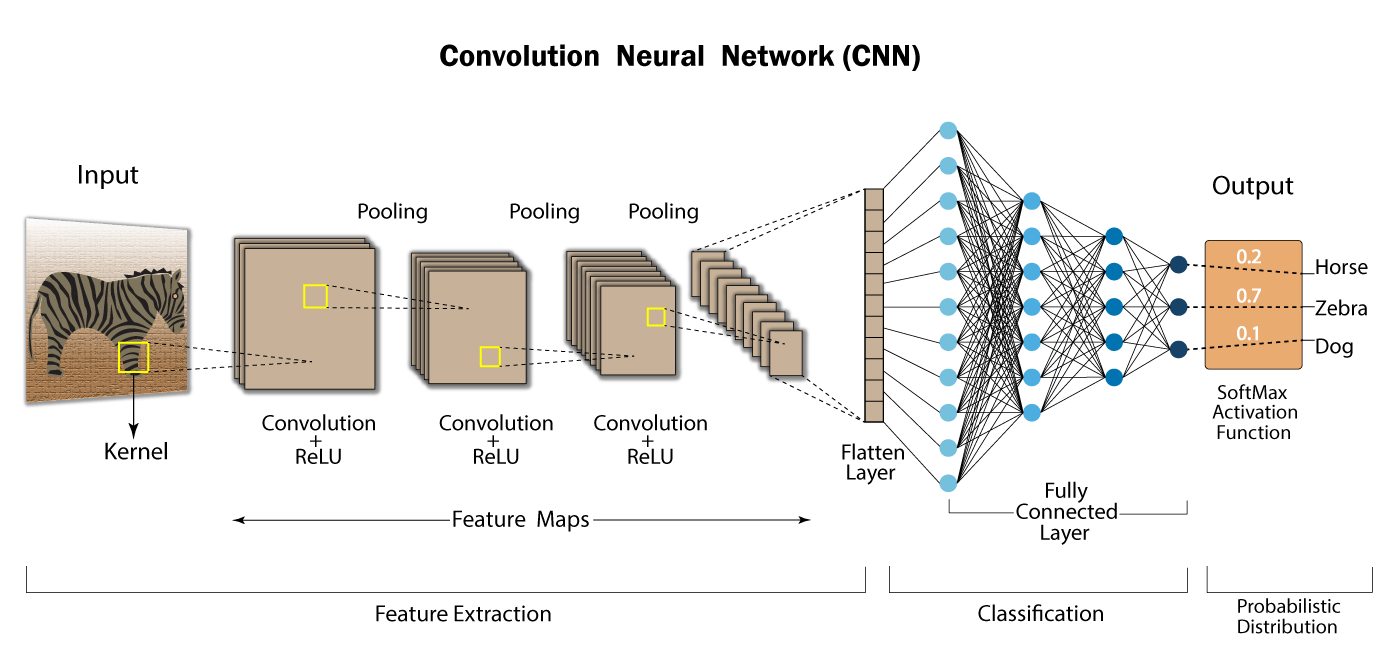

[image from](https://www.analyticsvidhya.com/blog/2022/03/basics-of-cnn-in-deep-learning/)

## Conv2d

In [39]:
sample_inputs.shape

torch.Size([32, 1, 28, 28])

In [40]:
m = torch.nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1).to(device)
output = m(sample_inputs)

output.shape

torch.Size([32, 8, 28, 28])

In [41]:
m = torch.nn.Conv2d(in_channels=1, out_channels=24, kernel_size=3, stride=2, padding=1).to(device)
output = m(sample_inputs)

output.shape

torch.Size([32, 24, 14, 14])

In [42]:
m1 = torch.nn.Conv2d(in_channels=24, out_channels=3, kernel_size=3, stride=1, padding=1).to(device)
output = m1(output)

output.shape

torch.Size([32, 3, 14, 14])

In [43]:
for o in m.parameters():
    print('--------')
    print(o.shape)

--------
torch.Size([24, 1, 3, 3])
--------
torch.Size([24])


## Max Pooling

In [48]:
sample_inputs.shape

torch.Size([32, 1, 28, 28])

In [49]:
m = torch.nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
output = m(sample_inputs)

output.shape

torch.Size([32, 1, 28, 28])

In [50]:
m = torch.nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
output = m(sample_inputs)

output.shape

torch.Size([32, 1, 14, 14])

In [51]:
for o in m.parameters():
    print('--------')
    print(o.shape)

## CNN

In [52]:
class CNN(torch.nn.Module):

    def __init__(self):
        super().__init__()

        self.seq = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(8),
            torch.nn.MaxPool2d(kernel_size=3, stride=2, padding=1),

            torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(16),
            torch.nn.MaxPool2d(kernel_size=3, stride=2, padding=1),

            torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(16),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1),

            torch.nn.Flatten(),
            torch.nn.LazyLinear(10),
            # torch.nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.seq(x)

In [53]:
model = CNN()
model = model.to(device)

In [54]:
model(sample_inputs).shape

torch.Size([32, 10])

In [55]:
model

CNN(
  (seq): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (8): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Linear(in_features=256, out_features=10, bias=True)
  )
)

## Train

In [56]:
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [57]:
epoch = 12
for e in range(epoch):

    batch_loss = 0.0
    for b, (inputs, labels) in enumerate(train_loader):

        inputs = inputs.to(device)
        labels = labels.to(device)

        loss = loss_func(model(inputs), labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        batch_loss += loss.item()

        if b % 100 == 99:
            print(f'{loss.item():.4f} [{e + 1:2d}/{(b + 1) * len(inputs):4d}]')
        if b == len(train_loader) - 1:
            print(f'-------------> epoch {e + 1} loss : {batch_loss / len(train_loader):.4f}')

0.9260 [ 1/3200]
0.4007 [ 1/6400]
0.3792 [ 1/9600]
0.1817 [ 1/12800]
0.8067 [ 1/16000]
0.7431 [ 1/19200]
0.5629 [ 1/22400]
0.6508 [ 1/25600]
0.1170 [ 1/28800]
0.4918 [ 1/32000]
0.5304 [ 1/35200]
0.1641 [ 1/38400]
0.3997 [ 1/41600]
0.2386 [ 1/44800]
0.3900 [ 1/48000]
0.1535 [ 1/51200]
0.4969 [ 1/54400]
0.2037 [ 1/57600]
-------------> epoch 1 loss : 0.4157
0.1137 [ 2/3200]
0.0463 [ 2/6400]
0.4154 [ 2/9600]
0.3539 [ 2/12800]
0.3337 [ 2/16000]
0.2750 [ 2/19200]
0.2600 [ 2/22400]
0.1345 [ 2/25600]
0.3998 [ 2/28800]
0.5802 [ 2/32000]
0.3329 [ 2/35200]
0.3506 [ 2/38400]
0.3899 [ 2/41600]
0.2252 [ 2/44800]
0.2939 [ 2/48000]
0.2834 [ 2/51200]
0.2636 [ 2/54400]
0.2325 [ 2/57600]
-------------> epoch 2 loss : 0.3149
0.1227 [ 3/3200]
0.6356 [ 3/6400]
0.4331 [ 3/9600]
0.2443 [ 3/12800]
0.1933 [ 3/16000]
0.4220 [ 3/19200]
0.1098 [ 3/22400]
0.3270 [ 3/25600]
0.3320 [ 3/28800]
0.3576 [ 3/32000]
0.5002 [ 3/35200]
0.1554 [ 3/38400]
0.2798 [ 3/41600]
0.3557 [ 3/44800]
0.2863 [ 3/48000]
0.3635 [ 3/51200]

## Test

In [58]:
all_label_preds = []
all_labels = []

for b, (inputs, labels) in enumerate(test_loader):

    inputs = inputs.to(device)
    labels = labels.to(device)

    with torch.no_grad():

        preds = model(inputs)
        label_preds = torch.argmax(preds, dim=1)

        all_labels = all_labels + labels.to('cpu').numpy().tolist()
        all_label_preds = all_label_preds + label_preds.to('cpu').numpy().tolist()


In [59]:
all_label_preds[:20]

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 6, 8, 0]

In [60]:
from sklearn.metrics import accuracy_score

accuracy_score(all_labels, all_label_preds)

0.8969